<a href="https://colab.research.google.com/github/notAlex2/Translation-Team08-IFT6759/blob/master/notebooks/Attention_Viz_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os

IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    project_path = "/content/drive/My Drive/machine-translation/Translation-Team08-IFT6759/code"
else:
    project_path = "Translation-Team08-IFT6759/code"

os.chdir(project_path)

In [2]:
! nvidia-smi

Mon Apr 13 00:01:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
! pip install transformers==2.7

In [0]:
import os
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from transformer import *
from pretrained_tokenizer import Tokenizer
from utils import *
from eval_transformer_model import evaluate_batch

In [0]:
# plot_attention_weights is also added in utils.py
def plot_attention_weights(attention_weights, sentence, result, layer):
    """Visualize layer attention in transformer model """
    fig = plt.figure(figsize=(16, 8))
    attention_weights = tf.squeeze(attention_weights[layer], axis=0)
    for head in range(attention_weights.shape[0]):
        ax = fig.add_subplot(2, 4, head + 1)
        # title and labels, setting initial sizes
        fig.suptitle('{}'.format(layer), fontsize=12)
        # plot the attention weights
        ax.matshow(attention_weights[head][:-1, :], cmap='viridis')
        fontdict = {'fontsize': 12}
        ax.set_xticks(range(len(sentence) + 2))
        ax.set_yticks(range(len(result)))
        ax.set_ylim(len(result) - 1.5, -0.5)
        ax.set_xticklabels(['<start>'] + sentence + ['<end>'], fontdict=fontdict, rotation=90)
        ax.set_yticklabels(result, fontdict=fontdict)
        ax.set_xlabel('Head {}'.format(head + 1))

    plt.tight_layout()
    plt.show()

In [0]:
user_config = load_file("user_config.json")
inp_language = "en"
target_language = "fr"

# load pre-trained tokenizer
tokenizer_inp, tokenizer_tar = load_tokenizers(inp_language, target_language, user_config)

In [8]:
inp_text = "the girl buys milk at the market"
tokenizer_inp.MAX_LENGTH = 10
tokenizer_inp.encode(inp_text), tokenizer_inp.tokenize(inp_text)

({'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
  'input_ids': [1, 266, 4957, 17550, 4774, 413, 266, 916, 2, 0]},
 ['the', 'Ġgirl', 'Ġbuys', 'Ġmilk', 'Ġat', 'Ġthe', 'Ġmarket'])

In [9]:
model, optimizer, ckpt_manager = load_transformer_model(user_config, tokenizer_inp, tokenizer_tar)

Latest checkpoint restored!!


In [0]:
inp_text = "the girl buys milk at the market"
out_text = "La fille achète du lait au marché ."
inp_tokens = tokenizer_inp.tokenize(inp_text)
true_out_tokens = tokenizer_tar.tokenize(out_text)

input_ids = np.array([tokenizer_inp.encode(inp_text)["input_ids"]])
output_ids, attention_weights = evaluate_batch(model, input_ids, tokenizer_tar, max_length=15)
pred_out_tokens = tokenizer_tar.tokenize(tokenizer_tar.decode(output_ids[0]))

if true_out_tokens == pred_out_tokens:
    print("Model predicted exactly!")

In [23]:
for k,v in attention_weights.items():
    print(k, v.shape)

decoder_layer1_block1 (1, 8, 12, 12)
decoder_layer1_block2 (1, 8, 12, 10)
decoder_layer2_block1 (1, 8, 12, 12)
decoder_layer2_block2 (1, 8, 12, 10)
decoder_layer3_block1 (1, 8, 12, 12)
decoder_layer3_block2 (1, 8, 12, 10)
decoder_layer4_block1 (1, 8, 12, 12)
decoder_layer4_block2 (1, 8, 12, 10)


### Layer 4 Viz - Block 2 and Block 1

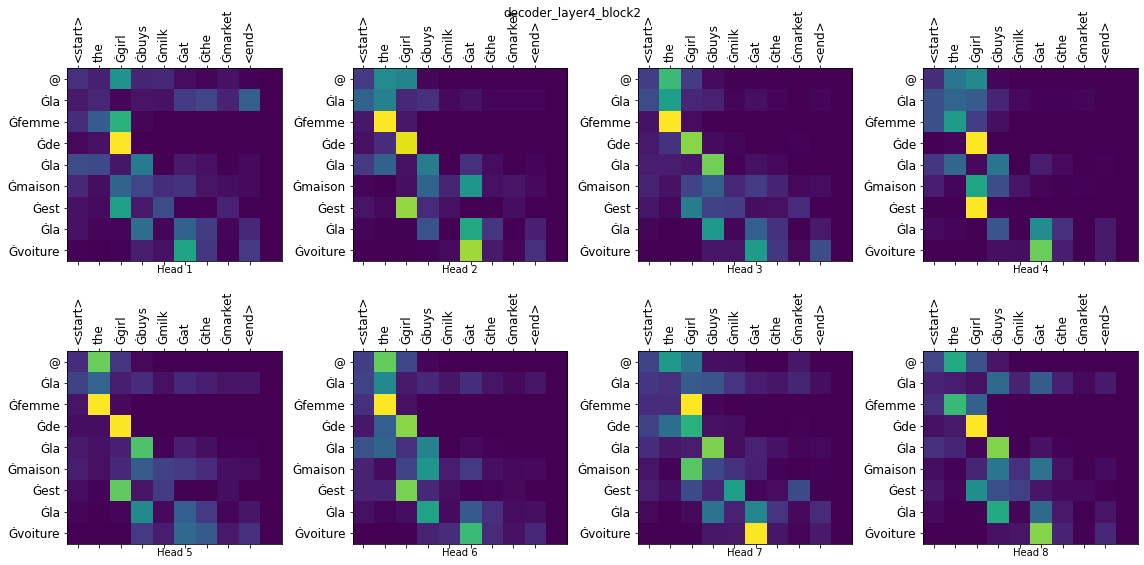

In [35]:
plot_attention_weights(attention_weights, inp_tokens, pred_out_tokens, 'decoder_layer4_block2')

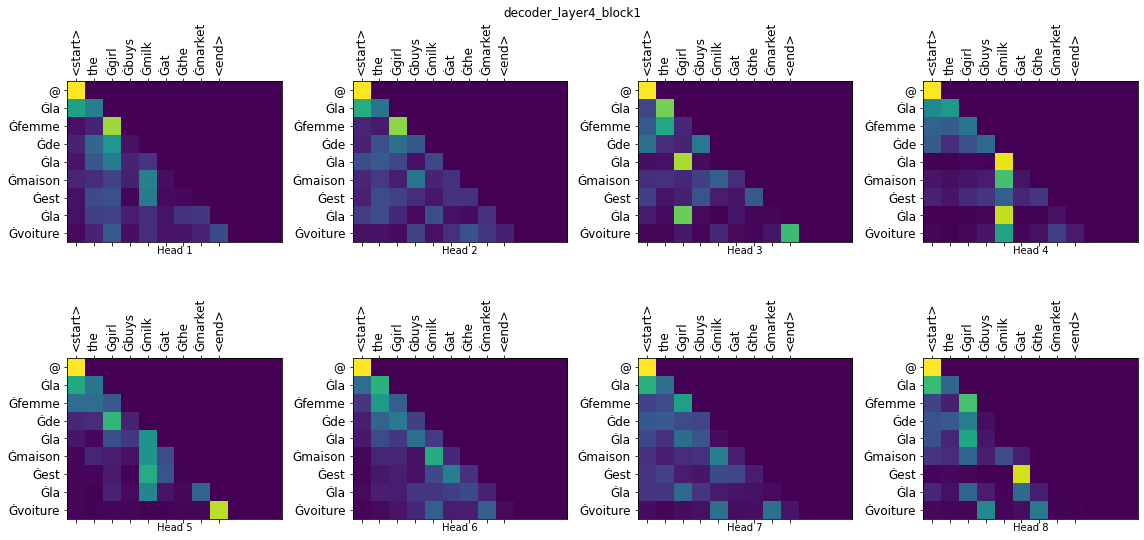

In [37]:
plot_attention_weights(attention_weights, inp_tokens, pred_out_tokens, 'decoder_layer4_block1')

### Layer 3 Viz - Block 2 and Block 1

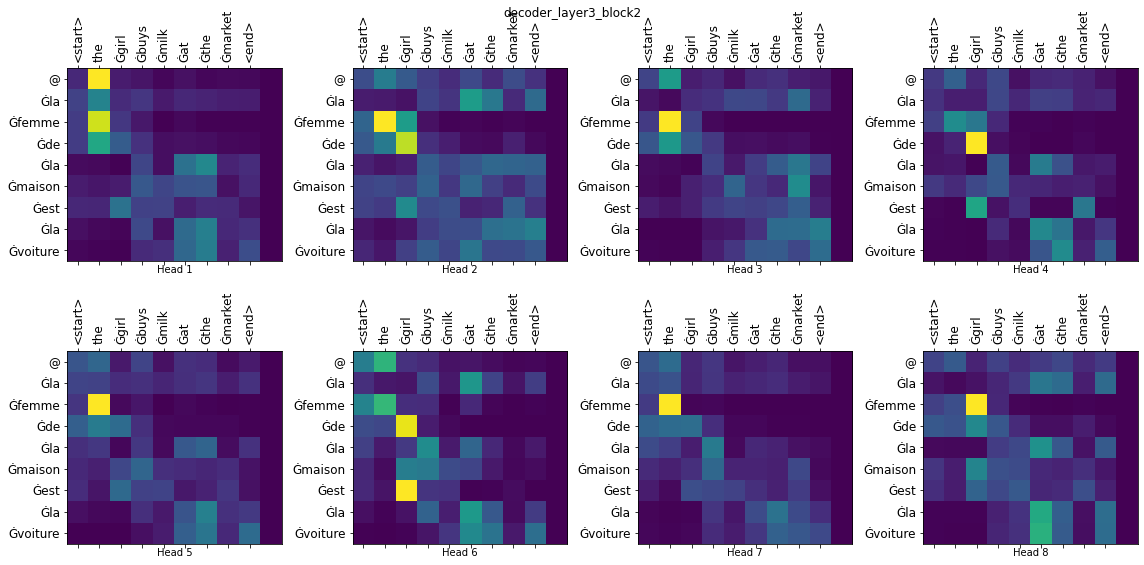

In [38]:
plot_attention_weights(attention_weights, inp_tokens, pred_out_tokens, 'decoder_layer3_block2')

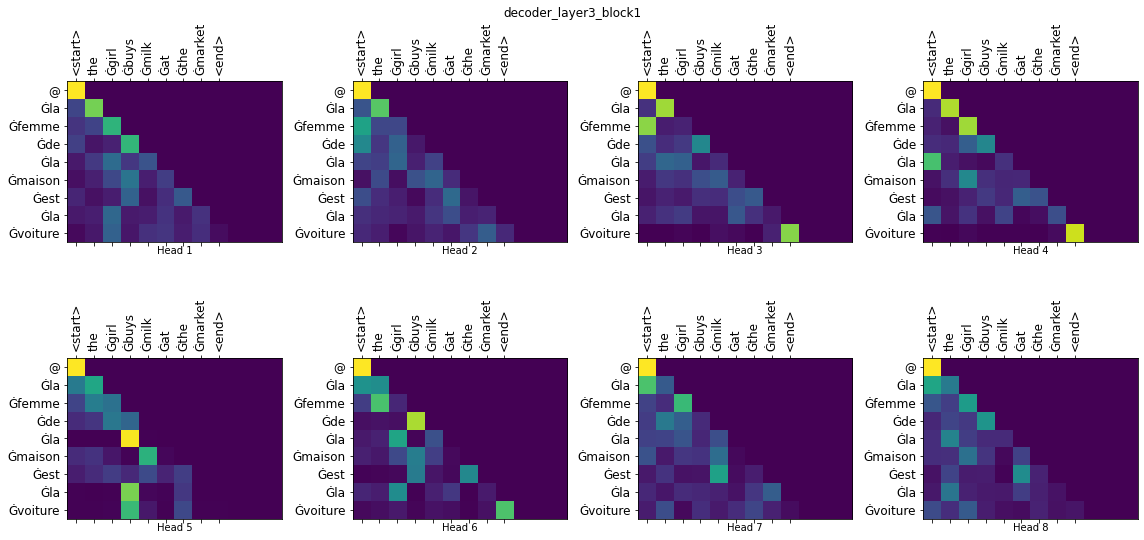

In [39]:
plot_attention_weights(attention_weights, inp_tokens, pred_out_tokens, 'decoder_layer3_block1')

### Layer 2 Viz - Block 2 and Block 1

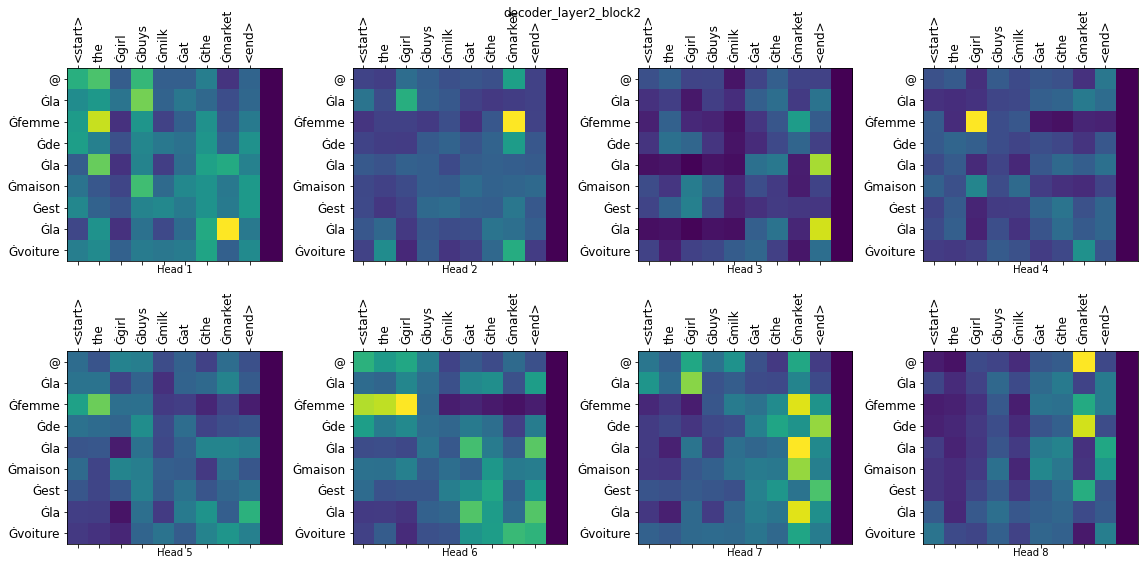

In [40]:
plot_attention_weights(attention_weights, inp_tokens, pred_out_tokens, 'decoder_layer2_block2')

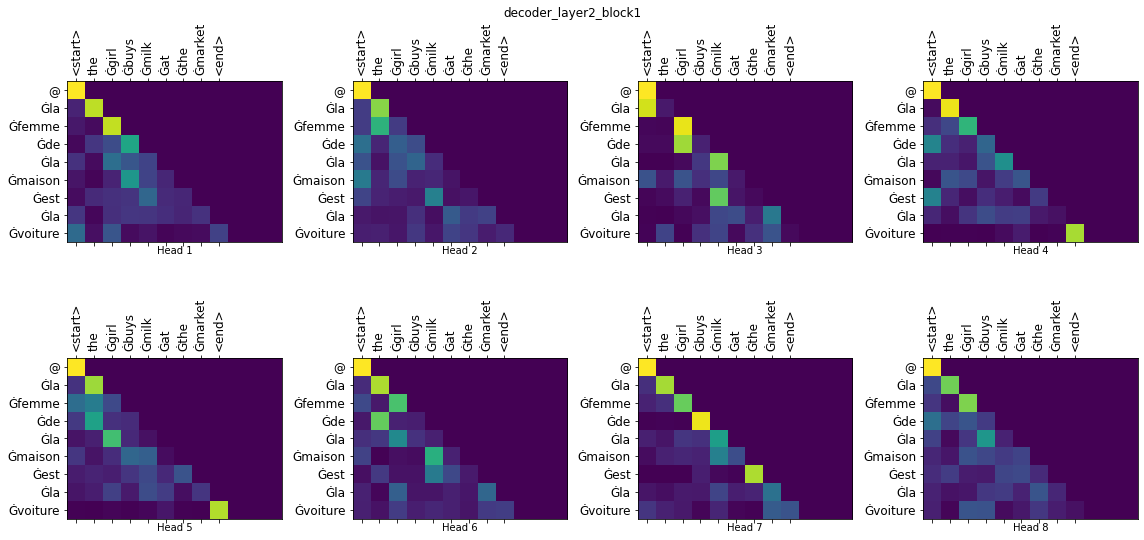

In [41]:
plot_attention_weights(attention_weights, inp_tokens, pred_out_tokens, 'decoder_layer2_block1')

### Layer 1 Viz - Block 2 and Block 1

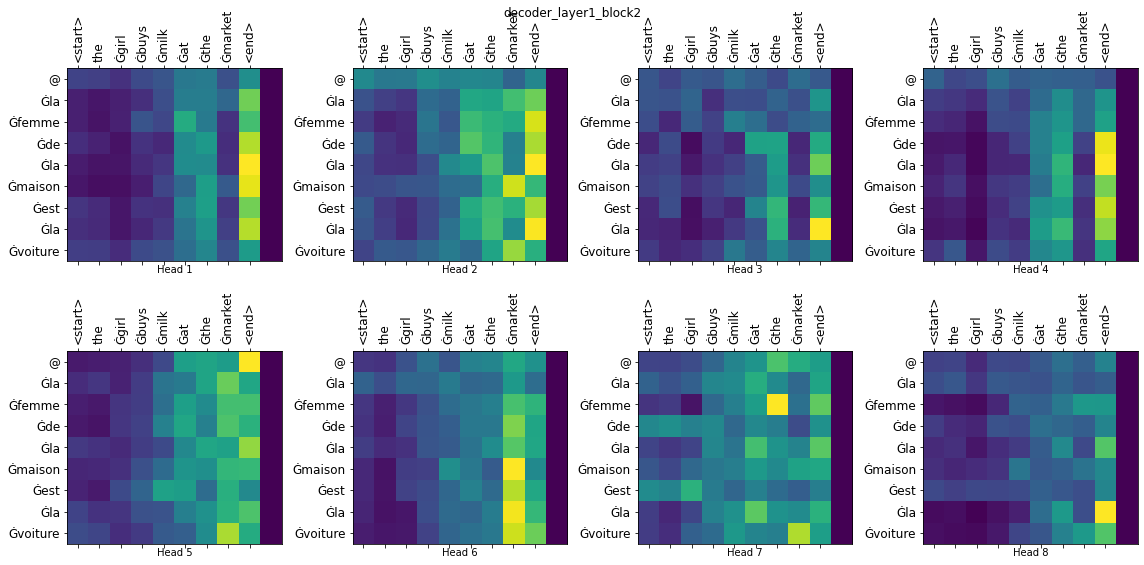

In [42]:
plot_attention_weights(attention_weights, inp_tokens, pred_out_tokens, 'decoder_layer1_block2')

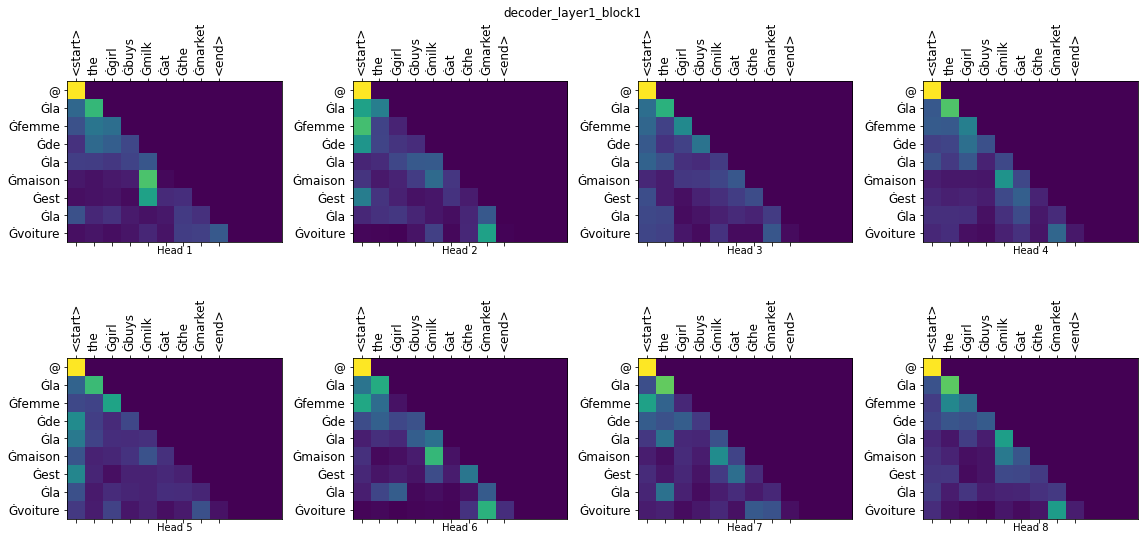

In [43]:
plot_attention_weights(attention_weights, inp_tokens, pred_out_tokens, 'decoder_layer1_block1')

#### Following section is for interactive Viz

* Not finished yet

In [0]:
tokenizer_inp.MAX_LENGTH = 12

inp_text = "the girl buys milk at the market"
encoded = tokenizer_inp.encode(inp_text)
encoded_inp = encoded['input_ids']
encoded_mask = encoded['attention_mask']
encoded_inp, tf.reshape(tf.convert_to_tensor(encoded_inp)[tf.convert_to_tensor(encoded_mask)==1], [1,-1,1,1])

In [0]:
def encode_eval(input_str, output_str, tokenizer_inp, tokenizer_tar):
    encoded = tokenizer_inp.encode(input_str)
    encoded_inp = encoded['input_ids']
    encoded_mask = encoded['attention_mask']
    inputs = tf.reshape(tf.convert_to_tensor(encoded_inp)[tf.convert_to_tensor(encoded_mask)==1], [1,-1,1,1])

    encoded = tokenizer_inp.encode(output_str)
    encoded_inp = encoded['input_ids']
    encoded_mask = encoded['attention_mask']
    outputs = tf.reshape(tf.convert_to_tensor(encoded_inp)[tf.convert_to_tensor(encoded_mask)==1], [1,-1,1,1])

    return {"inputs": inputs, "targets": outputs}

In [0]:
! pip install tensor2tensor

from tensor2tensor.visualization import attention

SIZE = 35
import numpy as np

def get_att_mats():
    enc_atts = []
    dec_atts = []
    encdec_atts = []

    for i in range(hparams.num_hidden_layers):
        enc_att = translate_model.attention_weights[
            "transformer/body/encoder/layer_%i/self_attention/multihead_attention/dot_product_attention" % i][0]
        dec_att = translate_model.attention_weights[
            "transformer/body/decoder/layer_%i/self_attention/multihead_attention/dot_product_attention" % i][0]
        encdec_att = translate_model.attention_weights[
            "transformer/body/decoder/layer_%i/encdec_attention/multihead_attention/dot_product_attention" % i][0]
        enc_atts.append(resize(enc_att))
        dec_atts.append(resize(dec_att))
        encdec_atts.append(resize(encdec_att))

    return enc_atts, dec_atts, encdec_atts

def resize(np_mat):
    # Sum across heads
    np_mat = np_mat[:, :SIZE, :SIZE]
    row_sums = np.sum(np_mat, axis=0)
    # Normalize
    layer_mat = np_mat / row_sums[np.newaxis, :]
    lsh = layer_mat.shape
    # Add extra dim for viz code to work.
    layer_mat = np.reshape(layer_mat, (1, lsh[0], lsh[1], lsh[2]))
    return layer_mat

def call_html():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              "d3": "https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.8/d3.min",
              jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
            },
          });
        </script>
        '''))

In [0]:
# Convert inputs and outputs to subwords
inp_text = "the girl buys milk at the market"
out_text = "La fille achète du lait au marché ."

inp_tokens = tokenizer_inp.tokenize(inp_text)
tar_tokens = tokenizer_tar.tokenize(out_text)

# Run eval to collect attention weights
example = encode_eval(inp_text, out_text, tokenizer_inp, tokenizer_tar)
checkpoint_dir = "../model/en-to-fr_L-4_H-128_A-8_DFF-512_V-30k_back_translation"

# enc_atts: numpy array, encoder self-attentions
#     [num_layers, batch_size, num_heads, enc_length, enc_length]
# dec_atts: numpy array, decoder self-attentions
#     [num_layers, batch_size, num_heads, dec_length, dec_length]
# encdec_atts: numpy array, encoder-decoder attentions
#     [num_layers, batch_size, num_heads, dec_length, enc_length]

num_layers, batch_size, num_heads, enc_length, dec_length = 8,1,8,16,16 

enc_atts = np.empty((num_layers, batch_size, num_heads, enc_length, enc_length))
dec_atts = np.random.rand(num_layers, batch_size, num_heads, dec_length, dec_length)
encdec_atts = np.random.rand(num_layers, batch_size, num_heads, dec_length, enc_length)

# with tfe.restore_variables_on_create(tf.train.latest_checkpoint(checkpoint_dir)):
#   translate_model.set_mode(Modes.EVAL)
#   translate_model(example)
# Get normalized attention weights for each layer
# enc_atts, dec_atts, encdec_atts = get_att_mats()

call_html()
attention.show(inp_tokens, tar_tokens, enc_atts, dec_atts, encdec_atts)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>